In [13]:
!pip install arxiv

In [14]:
import arxiv

In [19]:
keyphrases = ['"image synthesis"', 'deepfake']

In [23]:
def do_search(keyphrase):
    
    search = arxiv.Search(
      query = '"image synthesis"',
      #id_list: List[str] = [],
      max_results = 10000,
      sort_by = arxiv.SortCriterion.SubmittedDate,
      #sort_by: SortCriterion = SortCriterion.Relevanvce,
      sort_order = arxiv.SortOrder.Descending)
    
    return search

def parse_search_to_df(search):
    
    results = []
    
    for raw_result in search.results():
        parsed_result = {}
        parsed_result["published"] = raw_result.published
        parsed_result["url"] = raw_result.entry_id
        parsed_result["title"] = raw_result.title
        parsed_result["primary_category"] = raw_result.primary_category
        #parsed_result["categories"] = raw_result.categories
        results.append(parsed_result)
    
    result_df = pd.DataFrame(results)
    result_df["published"] = pd.to_datetime(result_df["published"])
    
    return result_df

def do_keyphrase_list(keyphrases):
    result_df = parse_search_to_df(do_search(keyphrases[0]))
    
    for keyphrase in keyphrases[1:]:
        tmp_df = parse_search_to_df(do_search(keyphrase))
        result_df = pd.concat([result_df,tmp_df], ignore_index=True)
        result_df.drop_duplicates(inplace=True)

    return result_df

#result_df = parse_search_to_df(do_search(keyphrases[0]))
result_df = do_keyphrase_list(keyphrases)
result_df


#TODO: does deduplication work or drops too much?

published                                      url  \
0   2022-09-13 17:47:39+00:00        http://arxiv.org/abs/2209.06192v1   
1   2022-09-09 12:42:00+00:00        http://arxiv.org/abs/2209.04275v1   
2   2022-09-09 10:17:49+00:00        http://arxiv.org/abs/2209.04223v1   
3   2022-09-09 08:44:06+00:00        http://arxiv.org/abs/2209.04183v1   
4   2022-09-06 14:37:01+00:00        http://arxiv.org/abs/2209.02536v1   
..                        ...                                      ...   
763 2008-07-10 13:06:07+00:00         http://arxiv.org/abs/0807.1642v1   
764 2006-07-13 07:05:43+00:00  http://arxiv.org/abs/astro-ph/0607291v1   
765 2005-11-08 14:40:47+00:00        http://arxiv.org/abs/cs/0511032v1   
766 1994-09-14 11:37:06+00:00  http://arxiv.org/abs/adap-org/9409003v3   
767 1994-09-08 10:01:48+00:00  http://arxiv.org/abs/adap-org/9409002v3   

                                                 title primary_category  
0    StoryDALL-E: Adapting Pretrained Text-to-Image...            cs.CV  
1    Temporally Adjustable Longitudinal Fluid-Atten...          eess.IV  
2    Pathology Synthesis of 3D Consistent Cardiac M...          eess.IV  
3    Generative Deformable Radiance Fields for Dise...            cs.CV  
4    Semantic Image Synthesis with Semantically Cou...            cs.CV  
..                                                 ...              ...  
763         Fringe Tracker for the VLTI Spectro-Imager         astro-ph  
764    VSI: a milli-arcsec spectro-imager for the VLTI         astro-ph  
765  Spatiotemporal sensistivity and visual attenti...            cs.GR  
766  Towards A Description Of Interactive Psychoinf...         adap-org  
767  Secondary Image Synthesis In Electronic Comput...         adap-org  

[768 rows x 4 columns]

- "deepfake"
- '"deep fake"'
- '"fake video"'
- '"video forgery"'
- '"image generation" "face"'

?? "video editing"
?? "image inpainting"

ARXIV time bias!!!!!


Arxiv: image synthesis kulcsszó CS-re szűrve jó lehet!

" használata harmadolja a találatokat


https://arxiv.org/search/advanced?advanced=&terms-0-operator=AND&terms-0-term=image+synthesis&terms-0-field=all&classification-computer_science=y&classification-physics_archives=all&classification-include_cross_list=include&date-filter_by=all_dates&date-year=&date-from_date=&date-to_date=&date-date_type=submitted_date&abstracts=show&size=50&order=-announced_date_first



In [4]:
publish_dates = []

counter = 0
for result in search.results():
    #print(result.title)
    publish_dates.append(result.published)
    counter+=1
print(counter)

768


In [5]:
"cs" in result.primary_category

False

In [6]:
import pandas as pd

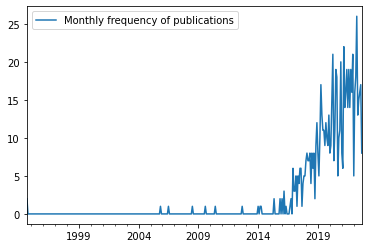

In [7]:
ax = pd.to_datetime(publish_dates).to_frame().resample("1M").count().plot()
ax.legend(labels=["Monthly frequency of publications"])
#.loc[lambda x: x >= pd.Timestamp("2014-01-01")]

 ARIMA(4,1,1)(0,0,0)[0] intercept
2022-09-30 00:00:00+00:00


[]

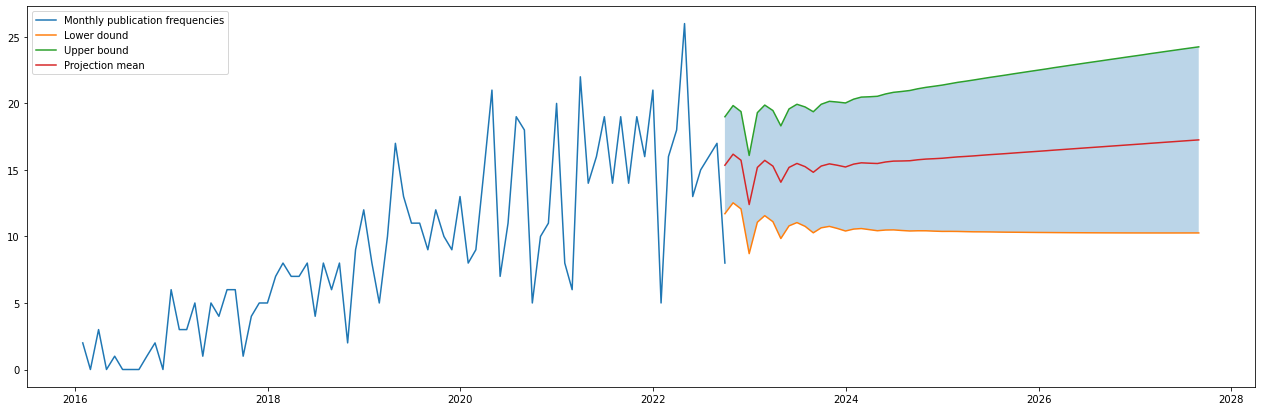

In [8]:
#!pip install pmdarima
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt

publish_df = pd.to_datetime(publish_dates).to_frame().resample("1M").count()

#publish_df = publish_df[publish_df.index.year >= 2016]


model = auto_arima(publish_df, start_p=0, start_q=0)
#model.fit(df)

def forecast_to_df(model, steps=10):
    forecast, conf_int = model.predict(n_periods=steps, return_conf_int=True)
    pred_df=pd.DataFrame()
    pred_df["lower"] = conf_int[:,0]
    pred_df["upper"] = conf_int[:,1]
    pred_df["pred"] = forecast.values
    return pred_df

STEPS = 60

pred_df = forecast_to_df(model, steps=STEPS)

print(model)
print(publish_df.index[-1])

pred_df.set_index(pd.date_range(start=publish_df.index[-1],periods=STEPS, freq="1M"), inplace=True)
fig, ax = plt.subplots(figsize=(22,7))
ax.plot(publish_df[publish_df.index.year >= 2016],label='Monthly publication frequencies')
ax.plot(pred_df, label=['Lower dound',"Upper bound",'Projection mean'])
ax.fill_between(x=pred_df.index,y1=pred_df['lower'],y2=pred_df['upper'],alpha=0.3)
ax.legend()
plt.plot()

In [9]:
result.published

datetime.datetime(1994, 9, 8, 10, 1, 48, tzinfo=datetime.timezone.utc)

In [10]:
for element in result.__dict__.items():
    print(element)

('entry_id', 'http://arxiv.org/abs/adap-org/9409002v3')
('updated', datetime.datetime(1994, 9, 22, 14, 5, 44, tzinfo=datetime.timezone.utc))
('published', datetime.datetime(1994, 9, 8, 10, 1, 48, tzinfo=datetime.timezone.utc))
('title', "Secondary Image Synthesis In Electronic Computer Photography (Vtorichnyj Sintez Izobrazhenij V Elektronnoj Komp'Yuternoj Fotografii)")
('authors', [arxiv.Result.Author('Denis Juriev')])
('summary', 'The principal scheme of the secondary image synthesis in electronic computer\nphotography is described. The crucial role of the Clebsch-Gordan coefficient\ncalculus is pointed out.')
('comment', 'the text is written in Russian in AMSTEX with cyrillic fonts, 3 pages')
('journal_ref', None)
('doi', None)
('primary_category', 'adap-org')
('categories', ['adap-org', 'nlin.AO'])
('links', [arxiv.Result.Link('http://arxiv.org/abs/adap-org/9409002v3', title=None, rel='alternate', content_type=None), arxiv.Result.Link('http://arxiv.org/pdf/adap-org/9409002v3', titl

In [11]:
result._raw

{'id': 'http://arxiv.org/abs/adap-org/9409002v3',
 'guidislink': True,
 'link': 'http://arxiv.org/abs/adap-org/9409002v3',
 'updated': '1994-09-22T14:05:44Z',
 'updated_parsed': time.struct_time(tm_year=1994, tm_mon=9, tm_mday=22, tm_hour=14, tm_min=5, tm_sec=44, tm_wday=3, tm_yday=265, tm_isdst=0),
 'published': '1994-09-08T10:01:48Z',
 'published_parsed': time.struct_time(tm_year=1994, tm_mon=9, tm_mday=8, tm_hour=10, tm_min=1, tm_sec=48, tm_wday=3, tm_yday=251, tm_isdst=0),
 'title': "Secondary Image Synthesis In Electronic Computer Photography (Vtorichnyj\n  Sintez Izobrazhenij V Elektronnoj Komp'Yuternoj Fotografii)",
 'title_detail': {'type': 'text/plain',
  'language': None,
  'base': 'http://export.arxiv.org/api/query?search_query=%22image+synthesis%22&id_list=&sortBy=submittedDate&sortOrder=descending&start=700&max_results=100',
  'value': "Secondary Image Synthesis In Electronic Computer Photography (Vtorichnyj\n  Sintez Izobrazhenij V Elektronnoj Komp'Yuternoj Fotografii)"},

In [12]:
sum(1 for _ in search.results())

768